Excercise 2.3

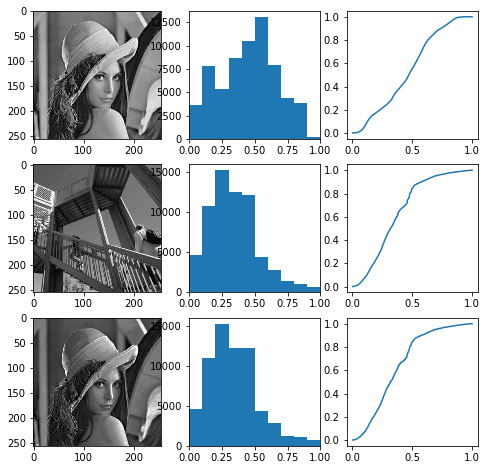

In [16]:
# EX 2.3
def histogram_match(source, target):
    source = rgb2gray(source)
    target = rgb2gray(target)

    img_cdf, bin_centers = exposure.cumulative_distribution(source)
    out = np.interp(img, bin_centers, img_cdf)
    # make a table for the target
    m_cdf, mbin_centers = exposure.cumulative_distribution(target)
    matched = np.interp(out, m_cdf, mbin_centers)
    matched = np.round(matched)
    matched = np.divide(matched, 255)
    from skimage import img_as_ubyte
    matched = img_as_ubyte(matched)
    return matched

from skimage import exposure
from skimage import io
from skimage import img_as_float
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
from skimage.color import rgb2gray
from skimage.exposure import equalize_hist
from skimage import exposure

img = io.imread("lena.jpg")
target = io.imread("stairs.jpg")
 
matched_img = histogram_match(img, target)
img = img_as_float(img)
img.shape
img_cdf, bin_centers = exposure.cumulative_distribution(img)

target = img_as_float(target)
target_img_cdf, target_bin_centers = exposure.cumulative_distribution(target)

matched_img = img_as_float(matched_img) 
matched_img_img_cdf, matched_img_bin_centers = exposure.cumulative_distribution(matched_img)

my_bins = 10

plt.figure(num=1, figsize=(8,8))
plt.subplot(331)
plt.imshow(img, cmap="gray")
plt.subplot(332)
plt.hist(img.flatten(),bins=my_bins,range=[0,1])
plt.xlim([0,1])
plt.subplot(333)
plt.plot (bin_centers, img_cdf)

plt.subplot(334)
plt.imshow(target, cmap="gray")
plt.subplot(335)
plt.hist(target.flatten(),bins=my_bins,range=[0,1])
plt.xlim([0,1])
plt.subplot(336)
plt.plot (target_bin_centers, target_img_cdf)

plt.subplot(337)
plt.imshow(matched_img, cmap="gray")
plt.subplot(338)
plt.hist(matched_img.flatten(),bins=my_bins,range=[0,1])
plt.xlim([0,1])
plt.subplot(339)
plt.plot (matched_img_bin_centers, matched_img_img_cdf)

Excercise 3.1 & 3.2

32.448786368


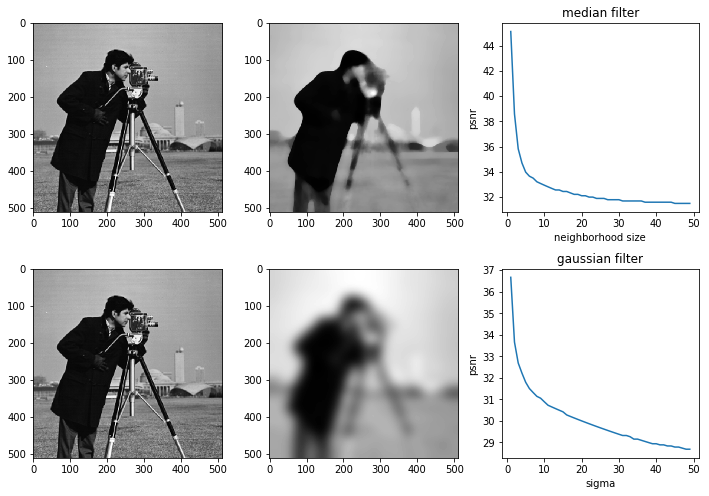

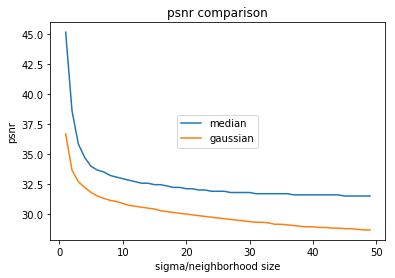

In [120]:
import skimage
%matplotlib inline
from skimage import io
import matplotlib
import numpy as np
import matplotlib.pyplot as plt
from skimage import data
from skimage.morphology import disk
from skimage.filters.rank import median
from scipy.ndimage.filters import gaussian_filter
from skimage import data
img = data.camera() # cameraman image

def median_filtering(my_img, neighborhood_size):
    return median(my_img,disk(neighborhood_size))

med = median_filtering(img, 15)
gaus = gaussian_filter(img, sigma=15)          

def mean_squared_error(img1, img2):
    diff = img2-img1
    diff_squared = np.square(diff)
    all_vals = diff_squared.flatten()
    return sum(all_vals)/len(all_vals)

def psnr(img1, img2):
    import math
    img_psnr= 20*math.log(np.amax(img),10)-10*math.log(mean_squared_error(img1,img2),10) 
    #MAX possible pixel value = 255 (8 bit represenation)
    return img_psnr

print psnr(img,med)

filter_level = range(1,50)
# sigma 0 returns the original image -> MSE = 0
# this means PSNR = infinite/not defined (10*log(255/0))
psnrs = [psnr(img,median_filtering(img,i)) for i in filter_level] 
#print psnrs

plt.figure(num=1, figsize=(12,8))
plt.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=None, hspace=0.3)
plt.subplot(231)
plt.imshow(img, cmap="gray")
plt.subplot(232)
plt.imshow(med, cmap="gray")
plt.subplot(233)
plt.title('median filter')
plt.ylabel('psnr')
plt.xlabel('neighborhood size')
plt.plot(filter_level,psnrs)

filter_level = range(1,50)
gpsnrs = [psnr(img,gaussian_filter(img,sigma=i)) for i in filter_level] 
#print psnrs

plt.figure(num=1, figsize=(12,4))
plt.subplot(234)
plt.imshow(img, cmap="gray")
plt.subplot(235)
plt.imshow(gaus, cmap="gray")
plt.subplot(236)
plt.title('gaussian filter')
plt.ylabel('psnr')
plt.xlabel('sigma')
plt.plot(filter_level,gpsnrs)

plt.figure()
plt.title('psnr comparison')
plt.ylabel('psnr')
plt.xlabel('sigma/neighborhood size')
plt.plot(filter_level,psnrs)
plt.plot(filter_level,gpsnrs)
plt.legend(['median', 'gaussian'], loc='center')
plt.show()

Result Interpretation:

-psnr: -the psnr value gives a measurement for indicating the reconstruction quality for compressed/filtered images
       -the psnr is infinte (or not defined), when the images are the same (mse = 0)

-the median filter keeps the edges relatively sharp
-the gaussian filter reduces the contrast and unsharpens the edges

   -so, the mean square error is higher when using gaussian compared to median
   -(especially, when using a higher sigma value/neighborhood size)   

-this implies, the psnr value decreases faster when using the gaussian
-further you can say that, images that were compressed with a median filter can be better reconstructed than those with 
 gaussian. in the "psnr comparison" plot you can see that, this also does not realy depend on the used sigma/neighborhood
 size (except when the sigma value is small (approx. sigma = 2)).